<img src="machine-learning-to-detect-fraud-finscience.jpeg" style = "width:1200px;height:420px"/>

# [Documentation](https://docs.google.com/document/d/1n6H7CkUxkRzROK3Wn3DA3M-R1OxBy-Aq/edit?usp=drive_link&ouid=108843826254688559596&rtpof=true&sd=true)

# Introduction

## ***In this case study, we are tasked with developing a predictive model for identifying fraudulent transactions in a financial company. With a dataset comprising 6,362,620 rows and 10 columns in CSV format, we have a significant amount of data to work with. Our objective is to leverage machine learning techniques to build a robust model that accurately detects fraudulent activities.***

## ***To achieve this goal, we will follow standard model development procedures, including data preprocessing, feature engineering, model training, and evaluation. The dataset will be divided into calibration and validation sets to train and test the model, respectively.***

## ***This case presents a unique challenge that requires a blend of statistical analysis, creative thinking, and judgment. While developing the machine learning model, we will focus not only on fine-tuning its performance but also on interpreting the results and deriving actionable insights.***

## ***By the end of this case study, we aim to deliver a reliable fraud detection model that can effectively identify fraudulent transactions, thereby helping the financial company mitigate financial losses and maintain trust with its customers.***

# Importing all essential liberaries

In [70]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")



# Check version information
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
# ... add version information for other libraries

# Print a message indicating successful import
print("All libraries imported successfully!")

Pandas version: 2.0.3
NumPy version: 1.25.0
Matplotlib version: 3.7.0
Seaborn version: 0.12.2
All libraries imported successfully!


In [2]:
fraud_df = pd.read_csv("fraud.csv") # Reading the dataset

# Understanding the structure of the dataset

In [3]:
fraud_df.head() # Top 5 rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
fraud_df.tail() # bottom 5 rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
fraud_df.shape # total number of  rows and columns

(6362620, 11)

In [6]:
fraud_df.size # total number of elements

69988820

In [7]:
# Information of the datatypes of the variables
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Looking for unique values in the dataset
fraud_df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [9]:
fraud_df.columns # column names

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Observations

### ***1. There are total 6362620 Rows, and 11 Columns***
### ***2. There are 3 categorical columns***


# Checking/Dealing missing values ,outliers, and anomalies

In [10]:
fraud_df.isnull().sum() # Checking for nulls

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# Counting the values of the categorical variables
columns_of_interest = ["type","isFraud","isFlaggedFraud"]

for column in columns_of_interest:
    print(f"{column}:\n{fraud_df[column].value_counts()}\n{'-->'*20}")

type:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->
isFraud:
isFraud
0    6354407
1       8213
Name: count, dtype: int64
-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->
isFlaggedFraud:
isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64
-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->-->


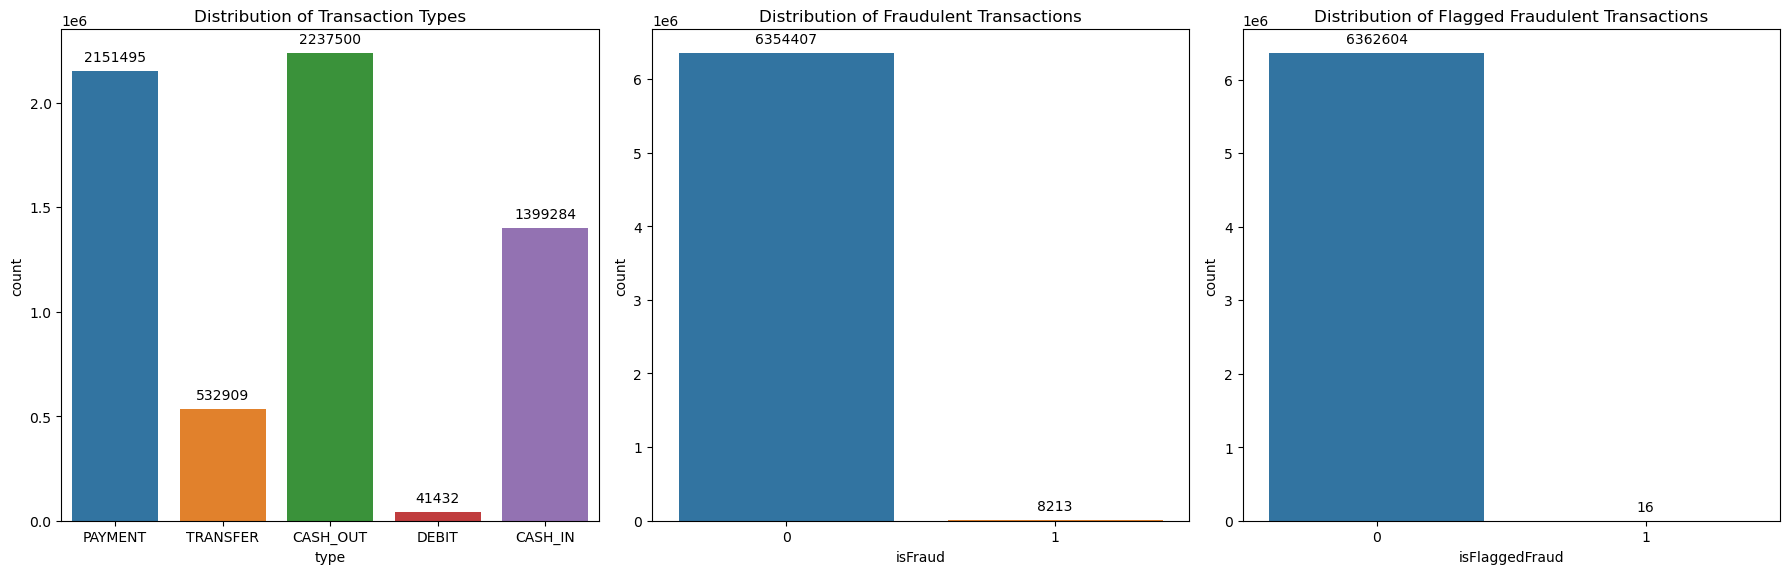

In [12]:

columns_of_interest = ["type", "isFraud", "isFlaggedFraud"]

# Setting up the figure and axes for the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Defining a function to add data labels
def add_labels(ax):
    for p in ax.patches:
        # Rounding the height of each bar to the nearest integer
        height = int(p.get_height())
        # Annotating the bar with the count
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plotting the distribution of 'type' column
sns.countplot(data=fraud_df, x='type', ax=axs[0])
axs[0].set_title('Distribution of Transaction Types')
add_labels(axs[0])

# Plotting the distribution of 'isFraud' column
sns.countplot(data=fraud_df, x='isFraud', ax=axs[1])
axs[1].set_title('Distribution of Fraudulent Transactions')
add_labels(axs[1])

# Plotting the distribution of 'isFlaggedFraud' column
sns.countplot(data=fraud_df, x='isFlaggedFraud', ax=axs[2])
axs[2].set_title('Distribution of Flagged Fraudulent Transactions')
add_labels(axs[2])

plt.tight_layout()
# Displaying the plots
plt.show()


In [13]:
# Dropping the unnecessary columns 
fraud_df = fraud_df.drop(columns=["nameOrig", "nameDest"])


In [14]:
fraud_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


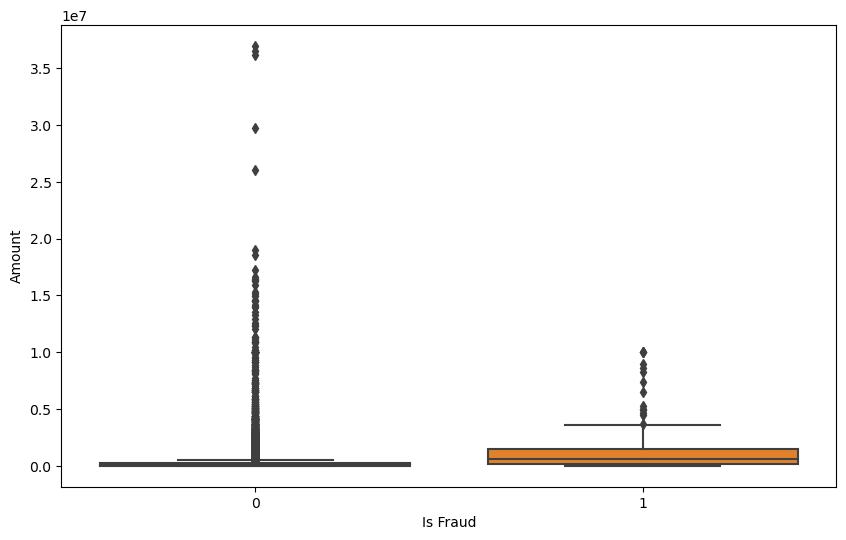

In [66]:
# Randomly sample the dataset
sample_size = 100000
sampled_df = fraud_df.sample(n=sample_size, random_state=42)
# Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=sampled_df, x='isFraud', y='amount')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

## Observations
### ***1. As we can see there are no null values in the dataset.***
### ***2. The categorical columns are imbalanced and isfraud and isflaggedfraud are almost in 1:10 ratio.***
### ***3. As the columns "nameOrig" and "nameDest" were useless for us hence they are being dropped.***
### ***4. There are too many outliers as we can see with the help of the box plot.***

# Analysing and visualizing the dataset

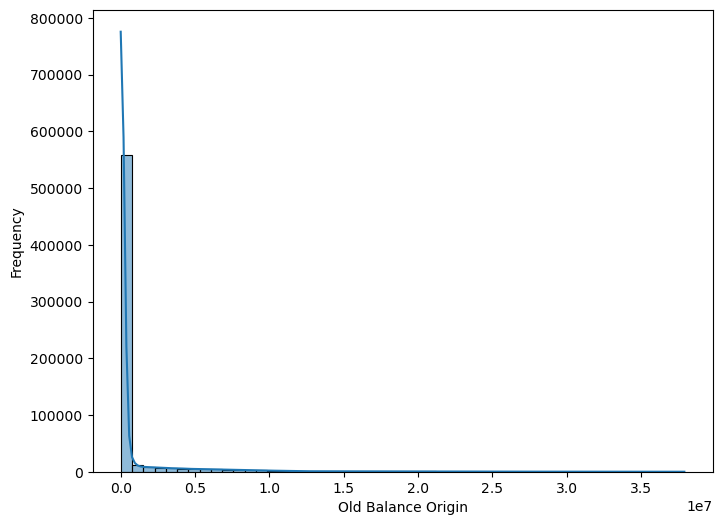

In [134]:
plt.figure(figsize=(8, 6))
sns.histplot(data=subset_df['oldbalanceOrg'], bins=50, kde=True)
plt.xlabel('Old Balance Origin')
plt.ylabel('Frequency')
plt.show()



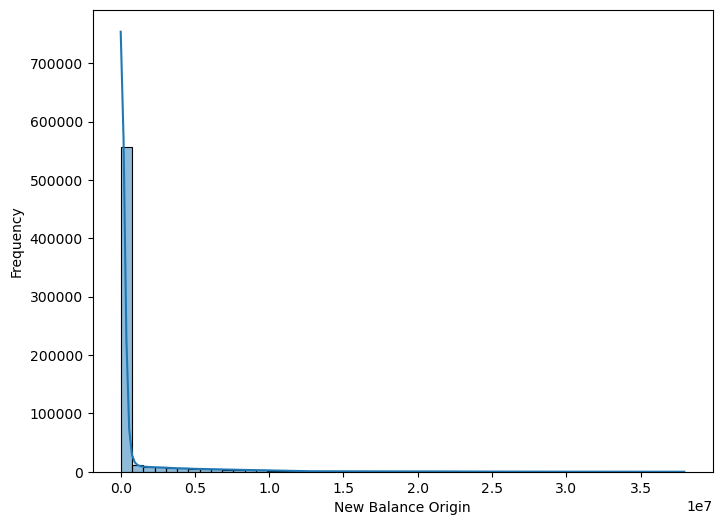

In [135]:
plt.figure(figsize=(8, 6))
sns.histplot(data=subset_df['newbalanceOrig'], bins=50, kde=True)
plt.xlabel('New Balance Origin')
plt.ylabel('Frequency')
plt.show()


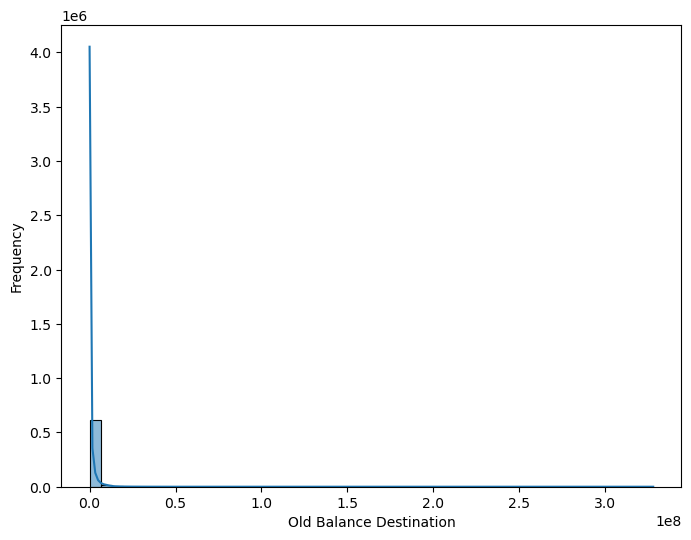

In [136]:
plt.figure(figsize=(8, 6))
sns.histplot(data=subset_df['oldbalanceDest'], bins=50, kde=True)
plt.xlabel('Old Balance Destination')
plt.ylabel('Frequency')
plt.show()


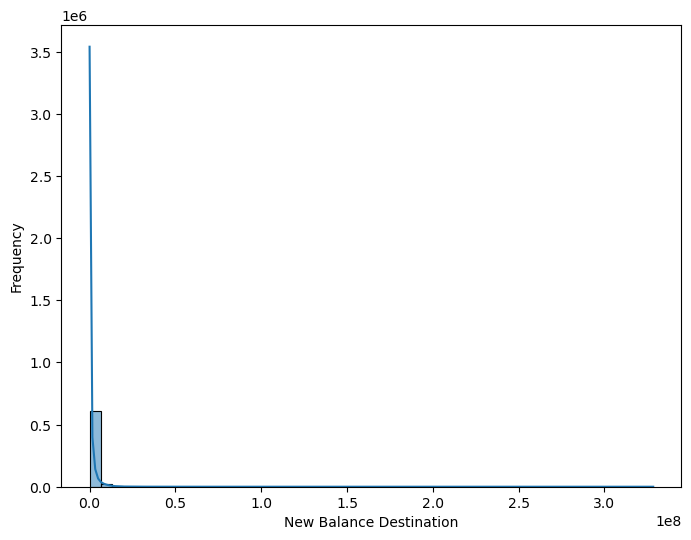

In [133]:
plt.figure(figsize=(8, 6))
sns.histplot(data=subset_df['newbalanceDest'], bins=50, kde=True)
plt.xlabel('New Balance Destination')
plt.ylabel('Frequency')
plt.show()


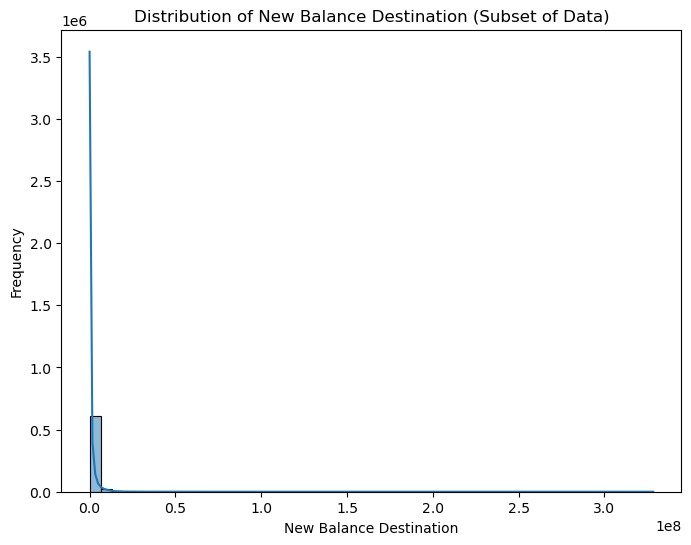

In [21]:
# Define the fraction of data you want to plot (e.g., 10%)
data_fraction = 0.1  # Adjust this as needed

# Filter the DataFrame to select a subset of the data
subset_df = fraud_df.sample(frac=data_fraction, random_state=42)  # Randomly sample a fraction of the data

# Plot the distribution of 'newbalanceDest' on the subset of data
plt.figure(figsize=(8, 6))
sns.histplot(data=subset_df['newbalanceDest'], bins=50, kde=True)
plt.title('Distribution of New Balance Destination (Subset of Data)')
plt.xlabel('New Balance Destination')
plt.ylabel('Frequency')
plt.show()


### ***As we can see all of the above histplots are very much right skewed .*** 

In [78]:
# Randomly sample the dataset
sample_size = 100000  # Adjust the sample size as needed
sampled_df = fraud_df.sample(n=sample_size, random_state=42)


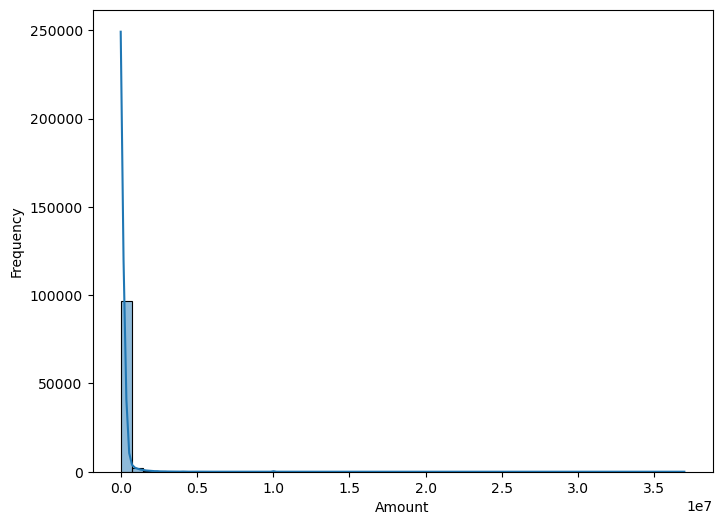

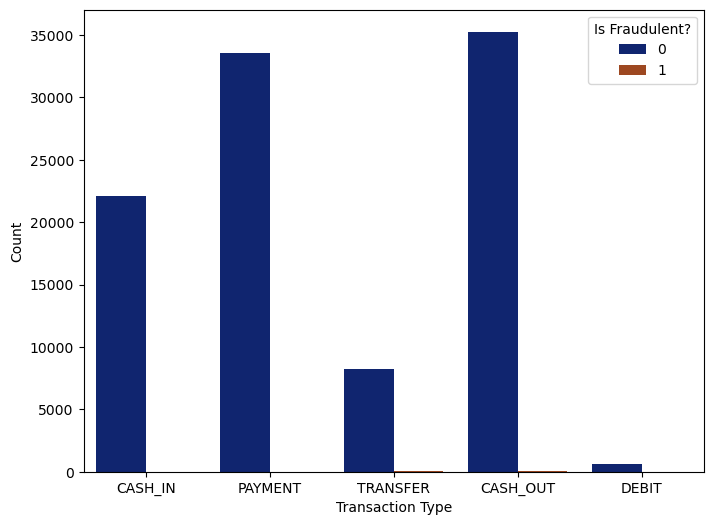

In [80]:
plt.figure(figsize=(8, 6))
sns.histplot(sampled_df['amount'], bins=50, kde=True)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Fraud Occurrences by Transaction Type
plt.figure(figsize=(8, 6))
sns.countplot(data=sampled_df, x='type', hue='isFraud', palette='dark')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraudulent?', loc='upper right')
plt.show()

### ***There are 2 types of transaction where the fraud is actually taking place. One is through transfer and another is through cash out.***

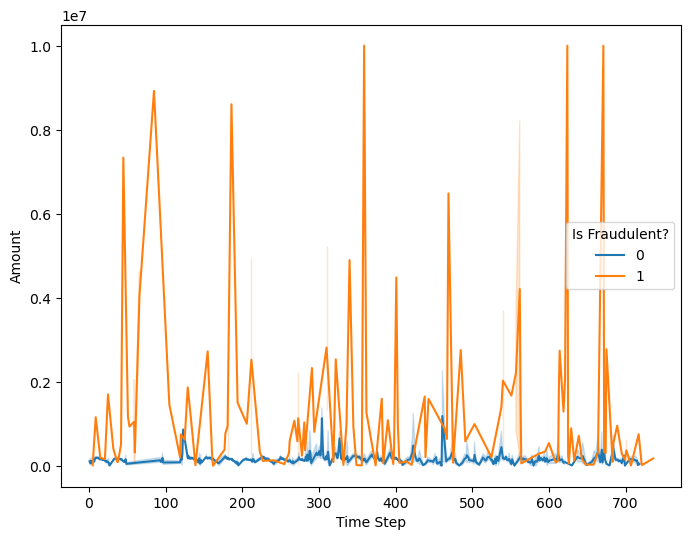

In [81]:
# Time-Series Analysis
plt.figure(figsize=(8, 6))
sns.lineplot(data=sampled_df, x='step', y='amount', hue='isFraud')
plt.xlabel('Time Step')
plt.ylabel('Amount')
plt.legend(title='Is Fraudulent?')
plt.show()



### ***There are small frauds occurring but there is minimum 2-4 days gap on the occurance of a huge fraud.***

In [89]:
fraud = fraud_df.loc[fraud_df.isFraud == 1]
nonfraud = fraud_df.loc[fraud_df.isFraud == 0]
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

In [90]:
print('Total number of fraud transaction is {}.'.format(fraud_df.isFraud.sum()))
print('Total number of fraud transaction which is marked as fraud {}.'.format(fraud_df.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))


Total number of fraud transaction is 8213.
Total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [91]:
print('There is 1 fraud transaction taking place in every 773 transaction  ')
print('Total Amount lost in fraud transaction is ${}.'.format(int(fraud.amount.sum())))

There is 1 fraud transaction taking place in every 773 transaction  
Total Amount lost in fraud transaction is $12056415427.


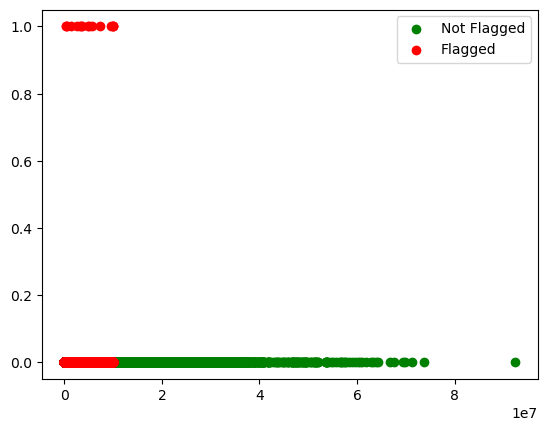

In [98]:
plt.figure()
plt.title=("Fraud transaction which are Flagged Correctly")
plt.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
plt.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

### ***The column "isFlaggedFraud" shows the fragged transactions but as we can see its not that good as The current system is allowing fraudulent transactions to pass through without being flagged correctly hence there is a need of a good predection model.***

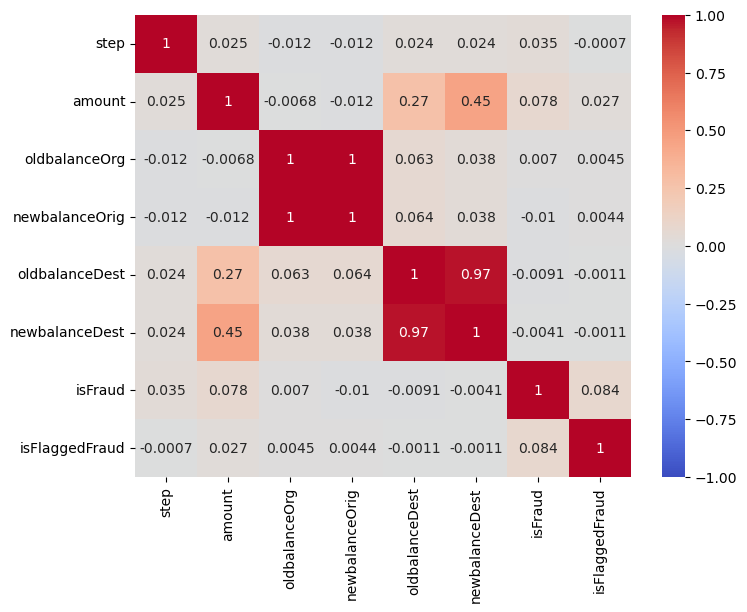

In [94]:
# Remove non-numeric columns or convert them to numeric if possible
numeric_columns = sampled_df.select_dtypes(include=['float64', 'int64'])

# Correlation Analysis
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### ***The above heatmap shows the coorelation between the features and as we can see there is a positive coorelation between all the numeric features and also with the target variable which is "isFraud"

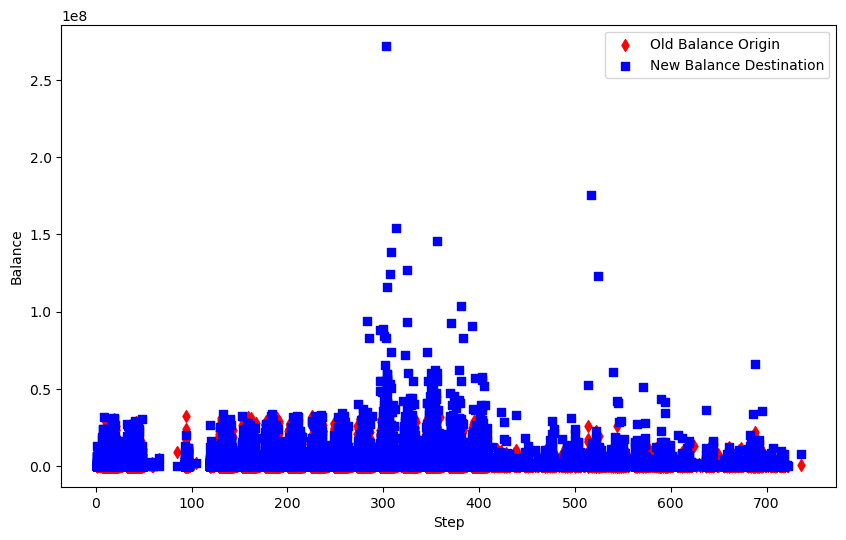

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['step'], sampled_df['oldbalanceOrg'], color='red', marker='d', label='Old Balance Origin')
plt.scatter(sampled_df['step'], sampled_df['newbalanceDest'], color='blue', marker='s', label='New Balance Destination')
plt.xlabel('Step')
plt.ylabel('Balance')
plt.legend()
plt.show()


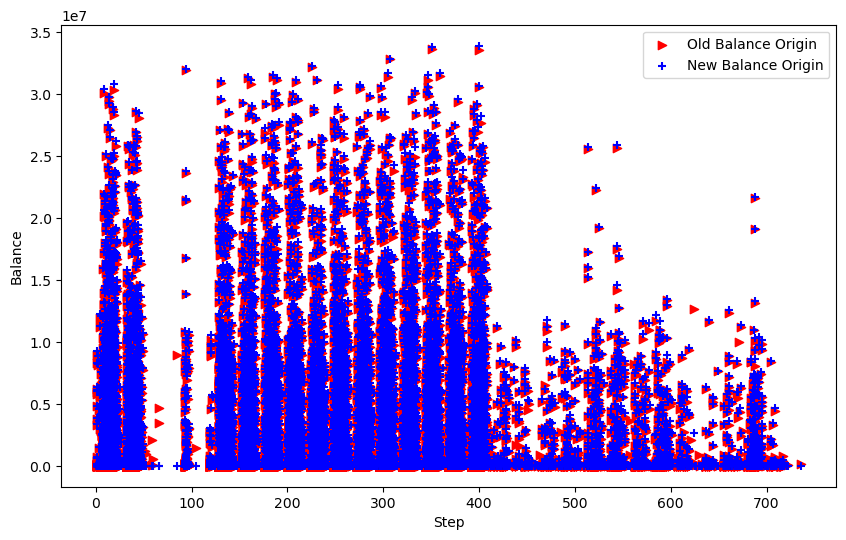

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['step'], sampled_df['oldbalanceOrg'], color='red', marker='>', label='Old Balance Origin ')
plt.scatter(sampled_df['step'], sampled_df['newbalanceOrig'], color='blue', marker='+', label='New Balance Origin')
plt.xlabel('Step')
plt.ylabel('Balance')
plt.legend()
plt.show()

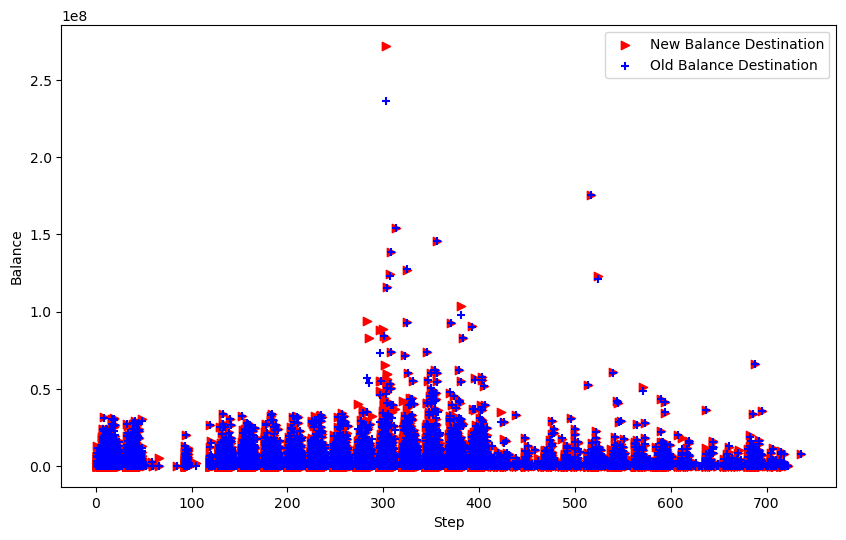

In [100]:
# Scatter Plot for balances over time with different markers
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['step'], sampled_df['newbalanceDest'], color='red', marker='>', label='New Balance Destination')
plt.scatter(sampled_df['step'], sampled_df['oldbalanceDest'], color='blue', marker='+', label='Old Balance Destination')
plt.xlabel('Step')
plt.ylabel('Balance')
plt.legend()
plt.show()

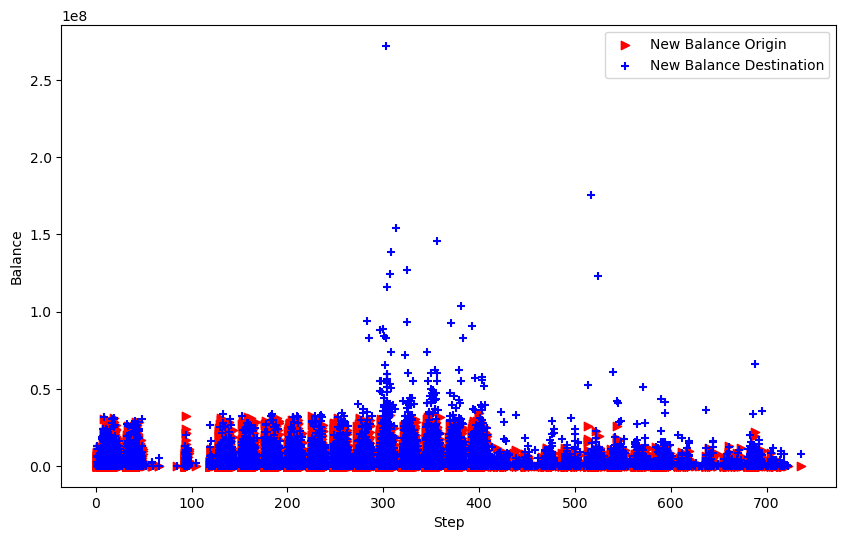

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['step'], sampled_df['newbalanceOrig'], color='red', marker='>', label='New Balance Origin')
plt.scatter(sampled_df['step'], sampled_df['newbalanceDest'], color='blue', marker='+', label='New Balance Destination')
plt.xlabel('Step')
plt.ylabel('Balance')
plt.legend()
plt.show()

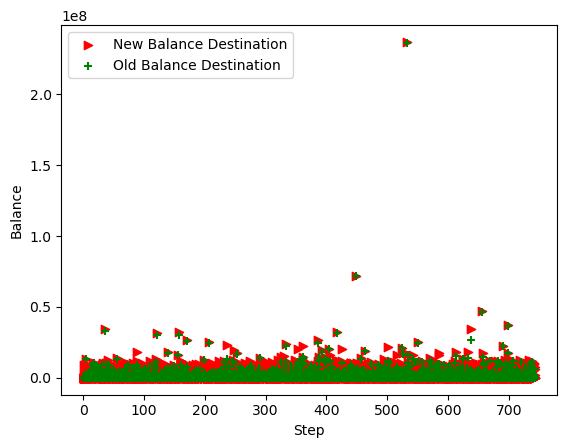

In [54]:
plt.scatter(fraud['step'], fraud['newbalanceDest'], color='red', marker='>', label='New Balance Destination')
plt.scatter(fraud['step'], fraud['oldbalanceDest'], color='green', marker='+', label='Old Balance Destination')
plt.xlabel('Step')
plt.ylabel('Balance')
plt.legend()
plt.show()

### ***As in the above scatter plots we can see that there is always an outlier in 300 step and this scatter plot justifies that the columns "oldbalanceOrg",	"newbalanceOrig"	,"oldbalanceDest"	,"newbalanceDest" are positively coorelated.***

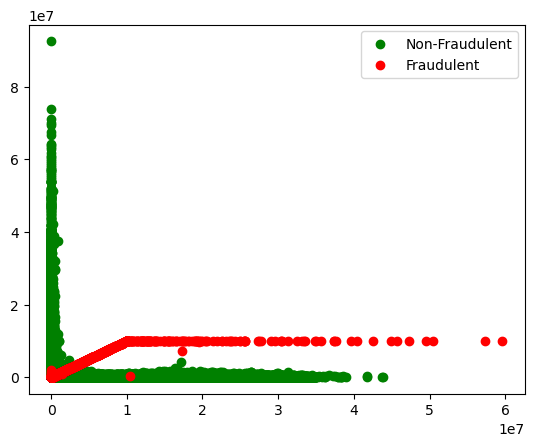

In [137]:

plt.scatter(nonfraud['oldbalanceOrg'], nonfraud['amount'], c='g', label='Non-Fraudulent')
plt.scatter(fraud['oldbalanceOrg'], fraud['amount'], c='r', label='Fraudulent')
plt.legend()
plt.show()


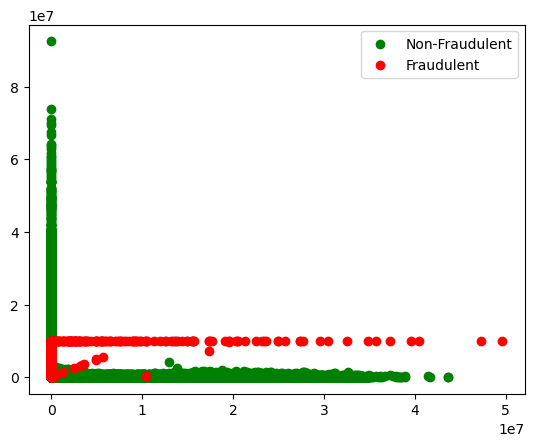

In [138]:

plt.scatter(nonfraud['newbalanceOrig'],nonfraud['amount'],c='g',label='Non-Fraudulent')
plt.scatter(fraud['newbalanceOrig'],fraud['amount'],c='r',label='Fraudulent')
plt.legend()
plt.show()

# Stastical analysis

In [124]:
from scipy.stats import chi2_contingency

# Example with 'type' and 'isFraud'
contingency_table = pd.crosstab(sampled_df['type'], sampled_df['isFraud'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Variables are independent (fail to reject H0)')
else:
    print('Variables are dependent (reject H0)')


Statistics=466.967, p=0.000
Variables are dependent (reject H0)


In [125]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(sampled_df[sampled_df['isFraud'] == 0]['amount'],
                    sampled_df[sampled_df['isFraud'] == 1]['amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Means are the same (fail to reject H0)')
else:
    print('Means are different (reject H0)')


Statistics=-24.740, p=0.000
Means are different (reject H0)


In [126]:
from scipy.stats import pearsonr

# Example with 'amount' and 'oldbalanceOrg'
stat, p = pearsonr(sampled_df['amount'], sampled_df['oldbalanceOrg'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Variables are uncorrelated (fail to reject H0)')
else:
    print('Variables are correlated (reject H0)')


Statistics=-0.007, p=0.033
Variables are correlated (reject H0)


In [127]:
from scipy.stats import mannwhitneyu

# Example with 'amount' based on 'isFraud' groups
stat, p = mannwhitneyu(sampled_df[sampled_df['isFraud'] == 0]['amount'],
                       sampled_df[sampled_df['isFraud'] == 1]['amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Distributions are the same (fail to reject H0)')
else:
    print('Distributions are different (reject H0)')


Statistics=3003499.500, p=0.000
Distributions are different (reject H0)


# Data cleaning & Encoding & Spliting

In [109]:
fraud_df = fraud_df.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [111]:
fraud_df.drop(['isFlaggedFraud'],axis=1,inplace=True)

In [112]:
fraud_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [113]:
X = fraud_df.drop(['isFraud'],axis=1)
y = fraud_df[['isFraud']]

# Machine Learning : Model Training & evaluating

In [118]:
# Splitting the data into training and testing sets with stratification
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Instantiate classifier
rf_classifier = RandomForestClassifier()

# Training the models
rf_classifier.fit(train_X, train_y)


# Predictions
rf_predictions = rf_classifier.predict(test_X)


# Evaluate the models
rf_precision= precision_score(test_y, rf_predictions)

print("Random Forest precision:", rf_precision)



Random Forest precision: 0.9773584905660377


In [131]:
#Evaluating the model based on different metrices
rf_precision= precision_score(test_y, rf_predictions)
rf_recall = recall_score(test_y, rf_predictions) 
rf_f1_score = f1_score(test_y, rf_predictions)

print("Random Forest precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest f1_score:", rf_f1_score)

Random Forest precision: 0.9773584905660377
Random Forest precision: 0.7881923311016433
Random Forest precision: 0.8726415094339622


In [128]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,rf_predictions))

0.7706199392500822


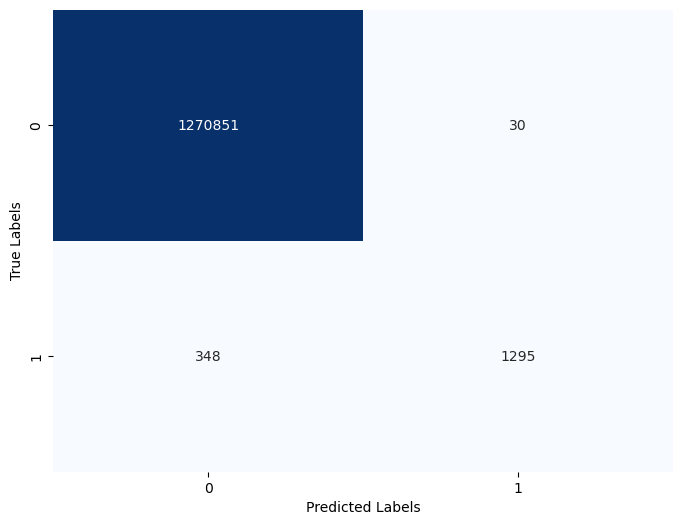

In [130]:
conf_matrix = confusion_matrix(test_y, rf_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()